2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)


In [611]:
import matplotlib.pyplot as plt
import matplotlib
import random
import time
matplotlib.rcParams['figure.figsize']=(16,8)

In [2]:
def get_random():
    return random.random() * 2 - 1

In [316]:
# y = ax + b
def data_create_function(x, a = -2.5, b = 6, random_factor = 1):
    return a * (x + get_random() * random_factor) + b + get_random() * random_factor

In [431]:
#define target function
def price(x, k, b):
    return k * x + b


$$ loss = \frac{1}{n} \sum^n_i{|y_i - \hat{y_i}|} = \frac{1}{n}\sum^n_i{|y_i - k * x_i - b|} $$

$$ \frac{\partial{loss}}{\partial{k}} =    \frac{1}{n}\sum^n_i{    \frac{   x_i, 当 k >= \frac{y_i - b}{x_i}时  }{ - x_i, 当 k < \frac{y_i - b}{x_i}时 } }                                 $$


$$ \frac{\partial{loss}}{\partial{b}} =     \frac{1}{n}\sum^n_i{    \frac{  1, 当 \hat y_i > y_i 时  }{  -1, 当 \hat y_i <= y_i 时 } }                                 $$

注：式中右边中间的横线不是除号，而是行分隔符

$$ \hat y_i = k * x_i + b $$

$$ \frac{y_i - b}{x_i} = \frac{ y_i - \hat y_i + k * x_i} {x_i}  $$

In [676]:
# you code here
def MAE_loss(y,y_hat):
    sum_value = sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat))) 
    return sum_value / len(list(y))#%%

# define partial derivative 
def MAE_partial_derivative_k(x, y, y_hat, k): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (x_i if k >= (y_i - y_hat_i + k * x_i) / x_i else -x_i)
    return 1/n * gradient

def MAE_partial_derivative_b(x, y, y_hat, b):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (1 if y_hat_i > y_i  else -1)
    return -2 / n * gradient

1.8474053668310688 0.4423246330201305
X [-10.05, -9.95, -9.85, -9.75, -9.65, -9.55, -9.45, -9.35, -9.25, -9.15, -9.05, -8.95, -8.85, -8.75, -8.65, -8.55, -8.45, -8.35, -8.25, -8.15, -8.05, -7.95, -7.85, -7.75, -7.65, -7.55, -7.45, -7.35, -7.25, -7.15, -7.05, -6.95, -6.85, -6.75, -6.65, -6.55, -6.45, -6.35, -6.25, -6.15, -6.05, -5.95, -5.85, -5.75, -5.65, -5.55, -5.45, -5.35, -5.25, -5.15, -5.05, -4.95, -4.85, -4.75, -4.65, -4.55, -4.45, -4.35, -4.25, -4.15, -4.05, -3.95, -3.85, -3.75, -3.65, -3.55, -3.45, -3.35, -3.25, -3.15, -3.05, -2.95, -2.85, -2.75, -2.65, -2.55, -2.45, -2.35, -2.25, -2.15, -2.05, -1.95, -1.85, -1.75, -1.65, -1.55, -1.45, -1.35, -1.25, -1.15, -1.05, -0.95, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.15, 2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95, 3.05, 3.15, 3.25, 3.35, 3.45, 3.55, 3.65, 3.75, 3.85, 3.95, 4.05, 4.15,

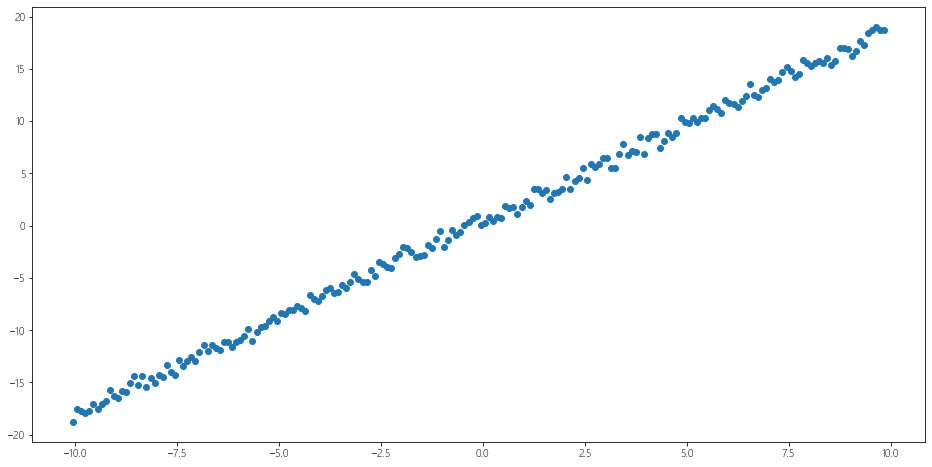

In [717]:
X = [(i - 100.5)/10 for i in range(200)]
_k = random.random() * 2 #- 1
_b = random.random() * 2 #- 1
print(_k, _b)
Y = [data_create_function(x, _k , _b ,  random_factor=0.4) for x in X]
print("X",X)
print("Y",Y)

plt.scatter(X, Y)

X_rm = X
y = Y

In [723]:
from sklearn.datasets import load_boston
dataset = load_boston()
x,y=dataset['data'],dataset['target']
X_rm = x[:,5]
print("X_rm",X_rm)
print("y",y)

X_rm [6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.25  7.489 7.802 8.37

-4.1661893655738265 0.9333288115213314 0.01
3.637012334030974 -0.7590032042889145 5.384180527225111


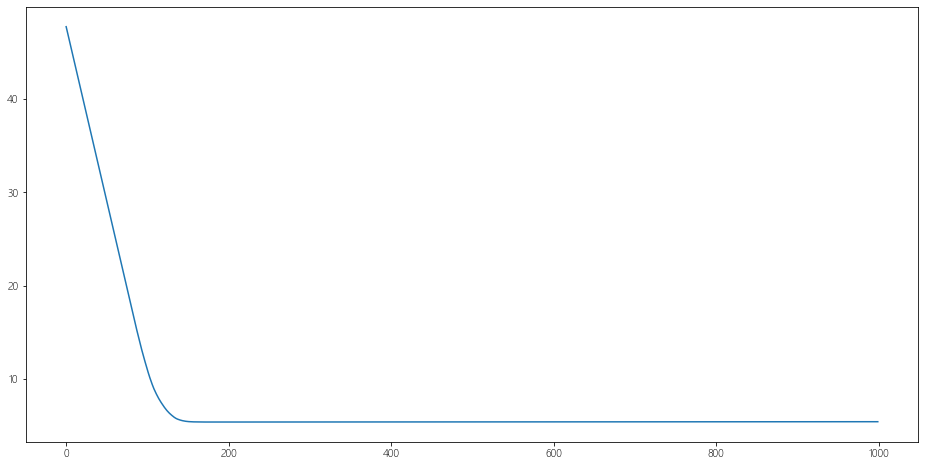

In [752]:
k = random.random() * 20 - 10  # -100 100
b = random.random() * 20 - 10  # -100 100
# k = _k
# b = _b

learning_rate = 1e-2
print(k, b, learning_rate)
iteration_num = 1000
losses = []
k_gradient = 0
b_gradient = 0
last_k_gradient = 1
last_b_gradient = 1
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = MAE_loss(y, price_use_current_parameters)
    losses.append(current_loss)
    # print("----loss: {}, k : {} b: {}".format(current_loss,k,b))
    
    k_gradient = MAE_partial_derivative_k(X_rm, y, price_use_current_parameters, k)
    b_gradient = MAE_partial_derivative_b(X_rm, y, price_use_current_parameters, b)
    # print("current_loss {}, k_gradient {}, b_gradient: {}".format(int(current_loss), k_gradient,b_gradient))
    k = k - k_gradient * learning_rate
    b = b - b_gradient * learning_rate
    # print(k, b)
    
    last_k_gradient = k_gradient
    last_b_gradient = b_gradient
    
best_k = k
best_b = b
print(k, b, current_loss)

plt.plot(list(range(iteration_num)),losses)

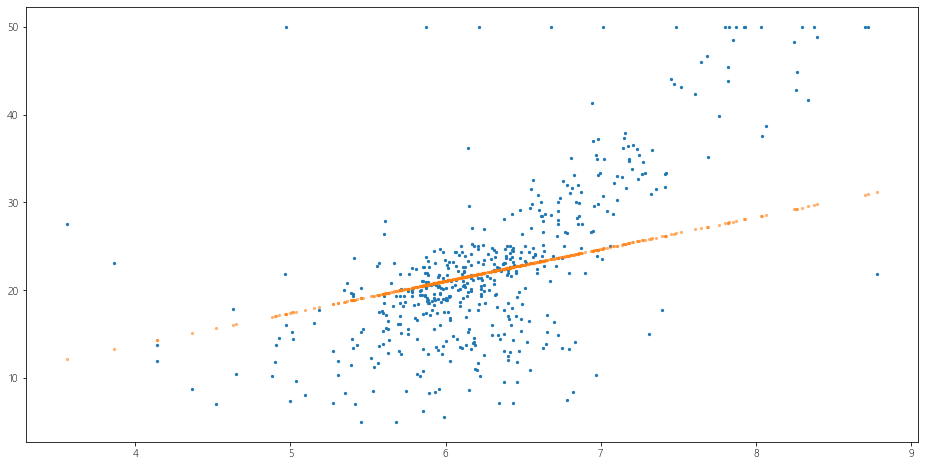

In [753]:
price_use_best_parameters = [price(x, best_k, best_b) for x in X_rm]

# price_use_best_parameters = [price(x, _k, _b) for x in X_rm]
 
plt.scatter(X_rm,y,s= 5)
plt.scatter(X_rm,price_use_best_parameters,  alpha= 0.5,s= 5)

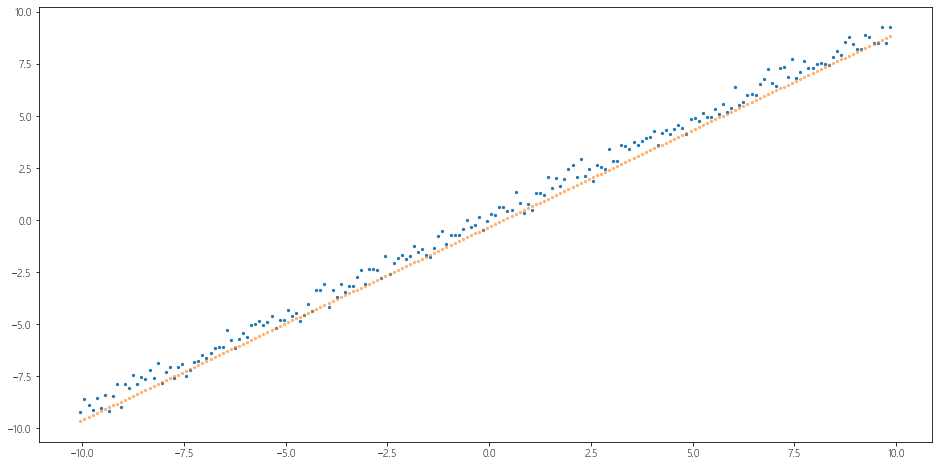

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)